In [1]:
import pandas as pd
import numpy as np
import glob
from collections import defaultdict

from scipy.signal import lfilter
from scipy.signal import savgol_filter

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from IPython.display import display, HTML


font = {'family' : 'normal',
#         'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

In [3]:
# def smooth(y, window_size = 20 , algo = 'mv_mean'):

#     if algo == 'mv_mean':
#         mask = np.ones((window_size,))
#         y_smth = np.convolve(y,mask/window_size, mode = 'valid')    
#         return y_smth
    
def smooth(y, window_size):
#     print(len(y))
#     print(np.isnan(y))
#     y = y[~np.isnan(y)]
#     y_smth = savgol_filter(y, window_size, 1)
    n = 15  # the larger n is, the smoother curve will be
    b = [1.0 / n] * n
    a = 1
    yy = lfilter(b,a,y)
    return yy
    
# n = 15  # the larger n is, the smoother curve will be
# b = [1.0 / n] * n
# a = 1
# yy = lfilter(b,a,y)
# plt.plot(x, yy, linewidth=2, linestyle="-", c="b")

def cut(x):
    if x >=0 and x<=1:
        return x


def plot_loss(df, same_figure = False, lbl =None, legend = None, logrithmic_scale = True, smoothing = True, cut_values = False, ax=None):
    d = pd.DataFrame()
    cols = df.columns[1:]
    for col in cols:
        d = pd.concat([d,df[col]], axis=0)
        
    if not same_figure:
        plt.figure()
    
    z = d.values
    z = z.reshape(z.shape[0],)
    label = 'loss'
    if smoothing:
        w_size = 59
        z = smooth(z, window_size=w_size)
        
    if logrithmic_scale:
        z = np.log10(z)
        label = 'logarithmic loss (base 10)'
        
    ax.plot(z, label=lbl) 
    plt.xlabel('steps')
    plt.ylabel(label)
    
    axes = plt.gca()
    if not logrithmic_scale:
        axes.set_ylim([0.0,None])
        if cut_values:
            if not logrithmic_scale:
                axes.set_ylim([0.0,1.4])
    else:
        axes.set_ylim([-2.0,None])
        if cut_values:
            axes.set_ylim([-3.0,3.0])
        
    if legend:
        leg = ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.29),
          ncol=4, fancybox=True, shadow=False, borderaxespad=0.)

def results_avg(root):
    average_results = {}
    
    folders = glob.glob(root)

    for folder in folders:
        tr=[]
        tst=[]
        sub_folders = glob.glob(folder+"/*")
      
        for sub_folder in sub_folders:
            tr.append(pd.read_csv(sub_folder+"/train_losses.csv"))
            tst.append(pd.read_csv(sub_folder+"/test_losses.csv"))
        
        sum_tr = 0
        sum_tst = 0
        for index in range(len(tr)):
            sum_tr+=tr[index]
            sum_tst+=tst[index]
        
        average_tr = sum_tr/len(tr)
        average_tst = sum_tst/len(tst)
        
        key = folder.split("/")[2]
     
        
        average_results[key] = (average_tr,average_tst)
        
#     display(HTML(average_results.get("0.0")[1].to_html()))
#     print(average_results)
    return average_results
            


def visualize(ide,data):

##################### logrithmic plots.

    fig = plt.figure(figsize=(10,7))
    ax  = fig.add_subplot(111)
        
    chartBox = ax.get_position() 
    ax.set_position([chartBox.x0, chartBox.y0, chartBox.width, chartBox.height * 0.9]) 
  
    for key, d in data.items():
        label = key
        plot_loss(d[0], same_figure = True, lbl=label, legend= True,logrithmic_scale = True, 
                  smoothing = True, cut_values = False, ax=ax)
        
    plt.savefig('/home/waleed/Desktop/Code/Estimation/code/Results/exp2/plots/'+ide+'/train_'+'_log'+'.png', dpi=300)
    
    fig = plt.figure(figsize=(10,7))
    ax  = fig.add_subplot(111)
        
    chartBox = ax.get_position() 
    ax.set_position([chartBox.x0, chartBox.y0, chartBox.width, chartBox.height * 0.9]) 
    
    for key, d in data.items():
        label = key
        plot_loss(d[1], same_figure = True, lbl=label, legend=True, logrithmic_scale = True, 
                  smoothing = True, cut_values = False, ax=ax)
    plt.savefig('/home/waleed/Desktop/Code/Estimation/code/Results/exp2/plots/'+ide+'/test_'+'_log'+'.png', dpi=300)
# ************************** With cut

    fig = plt.figure(figsize=(10,7))
    ax  = fig.add_subplot(111)
        
    chartBox = ax.get_position() 
    ax.set_position([chartBox.x0, chartBox.y0, chartBox.width, chartBox.height * 0.9]) 

    for key, d in data.items():
        label = key
        plot_loss(d[0], same_figure = True, lbl=label, legend= True, logrithmic_scale = True, 
                  smoothing = True, cut_values = True, ax=ax)
        
    plt.savefig('/home/waleed/Desktop/Code/Estimation/code/Results/exp2/plots/'+ide+'/train_'+'_log_cut'+'.png', dpi=300)
    
    fig = plt.figure(figsize=(10,7))
    ax  = fig.add_subplot(111)
        
    chartBox = ax.get_position() 
    ax.set_position([chartBox.x0, chartBox.y0, chartBox.width, chartBox.height * 0.9]) 
        
    
    for key, d in data.items():
        label = key
        plot_loss(d[1], same_figure = True, lbl=label, legend=True,logrithmic_scale = True, 
                  smoothing = True, cut_values = True,ax=ax)
    plt.savefig('/home/waleed/Desktop/Code/Estimation/code/Results/exp2/plots/'+ide+'/test_'+'_log_cut'+'.png', dpi=300)
##################### Linear plots.

    fig = plt.figure(figsize=(10,7))
    ax  = fig.add_subplot(111)
        
    chartBox = ax.get_position() 
    ax.set_position([chartBox.x0, chartBox.y0, chartBox.width, chartBox.height * 0.9]) 
    
    for key, d in data.items():
        label = key
        plot_loss(d[0], same_figure = True, lbl=label, legend= True, logrithmic_scale = False, 
                  smoothing = True, cut_values=False, ax=ax)
        
    plt.savefig('/home/waleed/Desktop/Code/Estimation/code/Results/exp2/plots/'+ide+'/train_'+'_linear'+'.png', dpi=300)
    

    fig = plt.figure(figsize=(10,7))
    ax  = fig.add_subplot(111)
        
    chartBox = ax.get_position() 
    ax.set_position([chartBox.x0, chartBox.y0, chartBox.width, chartBox.height * 0.9]) 

    for key, d in data.items():
        label = key
        plot_loss(d[1], same_figure = True, lbl=label, legend=True, logrithmic_scale = False, 
                  smoothing = True, cut_values = False, ax =ax)
    plt.savefig('/home/waleed/Desktop/Code/Estimation/code/Results/exp2/plots/'+ide+'/test_'+'_linear'+'.png', dpi=300)

#********************* With cut

    fig = plt.figure(figsize=(10,7))
    ax  = fig.add_subplot(111)
        
    chartBox = ax.get_position() 
    ax.set_position([chartBox.x0, chartBox.y0, chartBox.width, chartBox.height * 0.9]) 

    for key, d in data.items():
        label = key
        plot_loss(d[0], same_figure = True, lbl=label, legend= True, logrithmic_scale = False, 
                  smoothing = True, cut_values=True, ax=ax)
        
    plt.savefig('/home/waleed/Desktop/Code/Estimation/code/Results/exp2/plots/'+ide+'/train_'+'_linear_cut'+'.png', dpi=300)

    fig = plt.figure(figsize=(10,7))
    ax  = fig.add_subplot(111)
        
    chartBox = ax.get_position() 
    ax.set_position([chartBox.x0, chartBox.y0, chartBox.width, chartBox.height * 0.9]) 

    for key, d in data.items():
        label = key
        plot_loss(d[1], same_figure = True, lbl=label, legend=True, logrithmic_scale = False, 
                  smoothing = True, cut_values = True, ax=ax)
    plt.savefig('/home/waleed/Desktop/Code/Estimation/code/Results/exp2/plots/'+ide+'/test_'+'_linear_cut'+'.png', dpi=300)
    
    
    return 0
    

In [4]:

def visualize2(ide,data):

    for key, dd in data.items():
        mlist = dd
    
    ##################### logrithmic plots.

        fig = plt.figure(figsize=(10,7))
        ax  = fig.add_subplot(111)

        chartBox = ax.get_position() 
        ax.set_position([chartBox.x0, chartBox.y0, chartBox.width, chartBox.height * 0.9]) 

        for key2, d in mlist.items():
            label = key2
            plot_loss(d[0], same_figure = True, lbl=label, legend= True,logrithmic_scale = True, 
                      smoothing = True, cut_values = False, ax=ax)

        plt.savefig('/home/waleed/Desktop/Code/Estimation/code/Results/exp2/plots/all/'+key+'/train_'+'_log'+'.png', dpi=300)

        fig = plt.figure(figsize=(10,7))
        ax  = fig.add_subplot(111)

        chartBox = ax.get_position() 
        ax.set_position([chartBox.x0, chartBox.y0, chartBox.width, chartBox.height * 0.9]) 

        for key2, d in mlist.items():
            label = key2
            plot_loss(d[1], same_figure = True, lbl=label, legend=True, logrithmic_scale = True, 
                      smoothing = True, cut_values = False, ax=ax)
        plt.savefig('/home/waleed/Desktop/Code/Estimation/code/Results/exp2/plots/all/'+key+'/test_'+'_log'+'.png', dpi=300)
    # ************************** With cut

        fig = plt.figure(figsize=(10,7))
        ax  = fig.add_subplot(111)

        chartBox = ax.get_position() 
        ax.set_position([chartBox.x0, chartBox.y0, chartBox.width, chartBox.height * 0.9]) 

        for key2, d in mlist.items():
            label = key2
            plot_loss(d[0], same_figure = True, lbl=label, legend= True, logrithmic_scale = True, 
                      smoothing = True, cut_values = True, ax=ax)

        plt.savefig('/home/waleed/Desktop/Code/Estimation/code/Results/exp2/plots/all/'+key+'/train_'+'_log_cut'+'.png', dpi=300)

        fig = plt.figure(figsize=(10,7))
        ax  = fig.add_subplot(111)

        chartBox = ax.get_position() 
        ax.set_position([chartBox.x0, chartBox.y0, chartBox.width, chartBox.height * 0.9]) 


        for key2, d in mlist.items():
            label = key2
            plot_loss(d[1], same_figure = True, lbl=label, legend=True,logrithmic_scale = True, 
                      smoothing = True, cut_values = True,ax=ax)
        plt.savefig('/home/waleed/Desktop/Code/Estimation/code/Results/exp2/plots/all/'+key+'/test_'+'_log_cut'+'.png', dpi=300)
    ##################### Linear plots.

        fig = plt.figure(figsize=(10,7))
        ax  = fig.add_subplot(111)

        chartBox = ax.get_position() 
        ax.set_position([chartBox.x0, chartBox.y0, chartBox.width, chartBox.height * 0.9]) 

        for key2, d in mlist.items():
            label = key2
            plot_loss(d[0], same_figure = True, lbl=label, legend= True, logrithmic_scale = False, 
                      smoothing = True, cut_values=False, ax=ax)

        plt.savefig('/home/waleed/Desktop/Code/Estimation/code/Results/exp2/plots/all/'+key+'/train_'+'_linear'+'.png', dpi=300)


        fig = plt.figure(figsize=(10,7))
        ax  = fig.add_subplot(111)

        chartBox = ax.get_position() 
        ax.set_position([chartBox.x0, chartBox.y0, chartBox.width, chartBox.height * 0.9]) 

        for key2, d in mlist.items():
            label = key2
            plot_loss(d[1], same_figure = True, lbl=label, legend=True, logrithmic_scale = False, 
                      smoothing = True, cut_values = False, ax =ax)
        plt.savefig('/home/waleed/Desktop/Code/Estimation/code/Results/exp2/plots/all/'+key+'/test_'+'_linear'+'.png', dpi=300)

    #********************* With cut

        fig = plt.figure(figsize=(10,7))
        ax  = fig.add_subplot(111)

        chartBox = ax.get_position() 
        ax.set_position([chartBox.x0, chartBox.y0, chartBox.width, chartBox.height * 0.9]) 

        for key2, d in mlist.items():
            label = key2
            plot_loss(d[0], same_figure = True, lbl=label, legend= True, logrithmic_scale = False, 
                      smoothing = True, cut_values=True, ax=ax)

        plt.savefig('/home/waleed/Desktop/Code/Estimation/code/Results/exp2/plots/all/'+key+'/train_'+'_linear_cut'+'.png', dpi=300)

        fig = plt.figure(figsize=(10,7))
        ax  = fig.add_subplot(111)

        chartBox = ax.get_position() 
        ax.set_position([chartBox.x0, chartBox.y0, chartBox.width, chartBox.height * 0.9]) 

        for key2, d in mlist.items():
            label = key2
            plot_loss(d[1], same_figure = True, lbl=label, legend=True, logrithmic_scale = False, 
                      smoothing = True, cut_values = True, ax=ax)
        plt.savefig('/home/waleed/Desktop/Code/Estimation/code/Results/exp2/plots/all/'+key+'/test_'+'_linear_cut'+'.png', dpi=300)


    return 0


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
/home/waleed/CondaEnvironments/torch/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/waleed/CondaEnvironments/torch/lib/python3.7/site-packages/ipykernel_launcher.py:75: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/waleed/CondaEnvironments/torch/lib/python3.7/site-packages/ipykernel_launcher.py:89: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyp

0

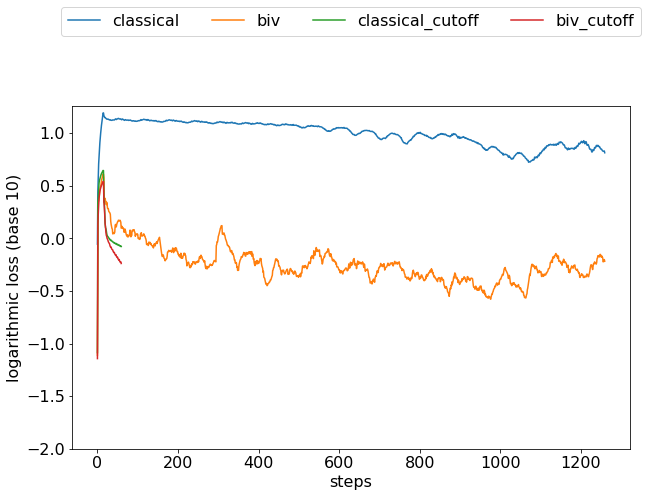

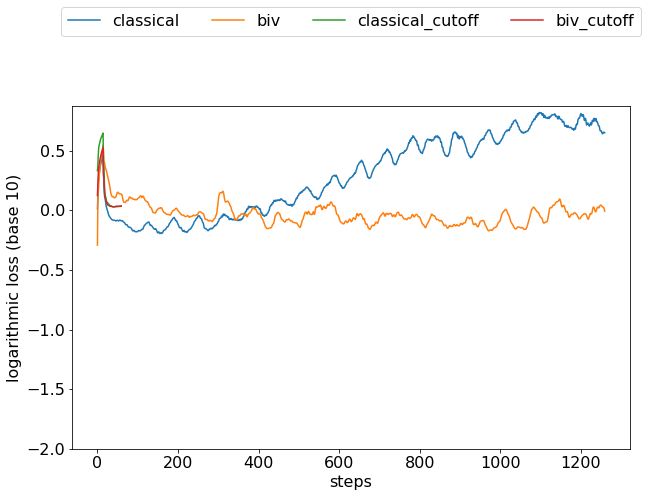

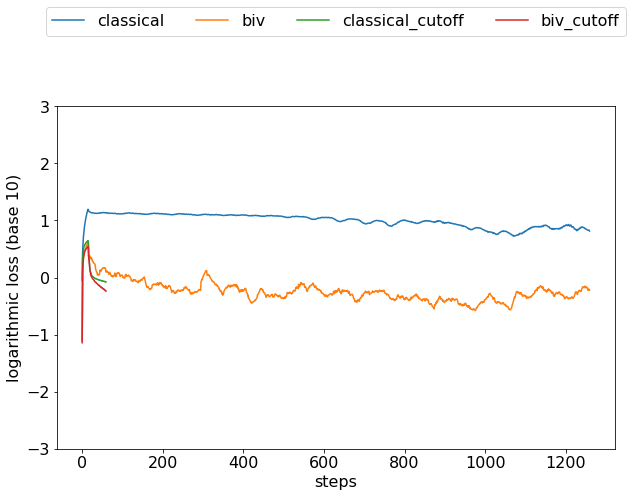

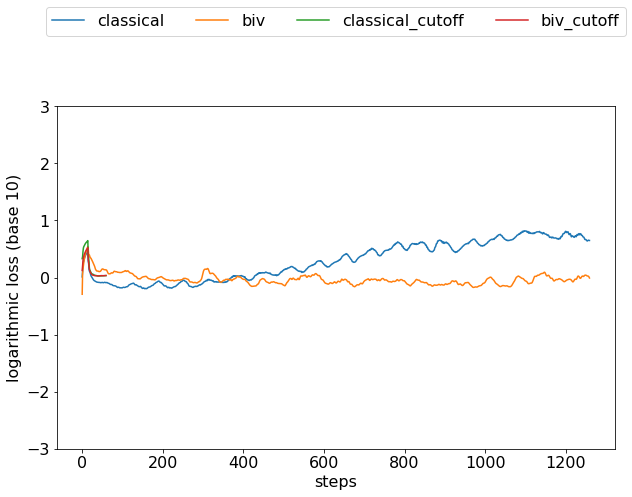

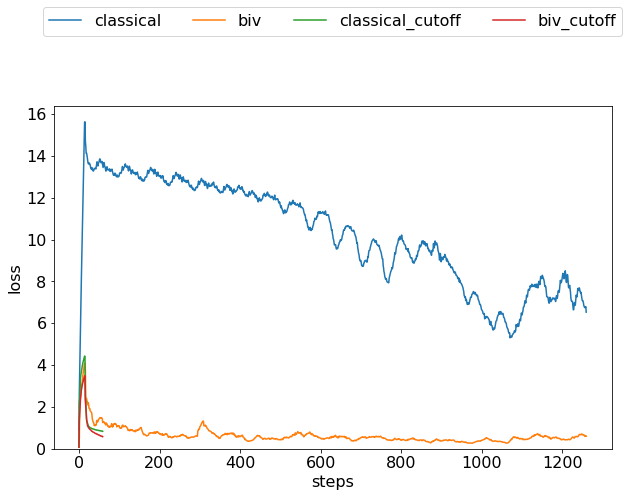

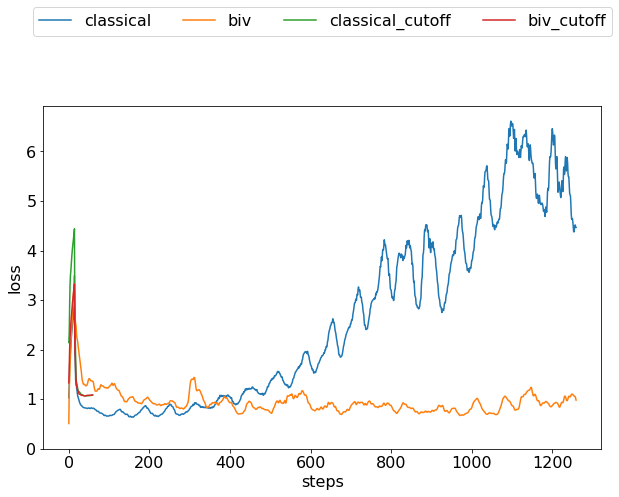

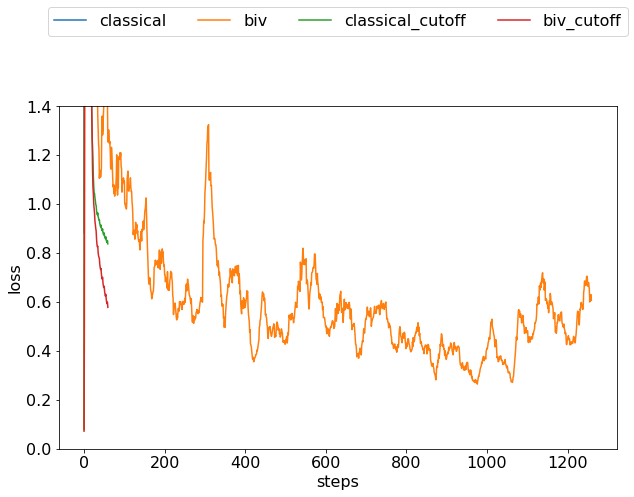

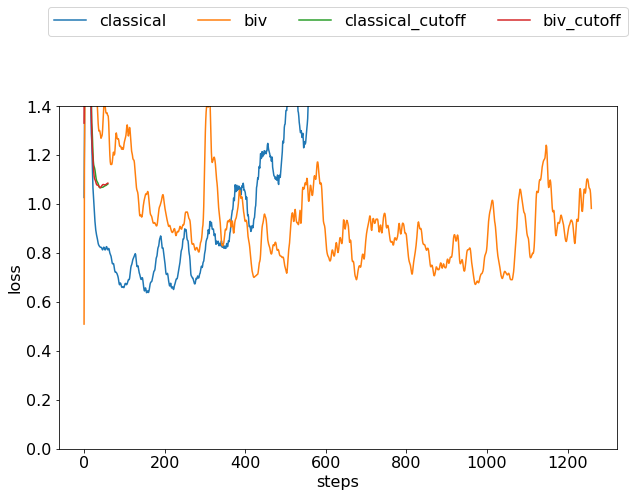

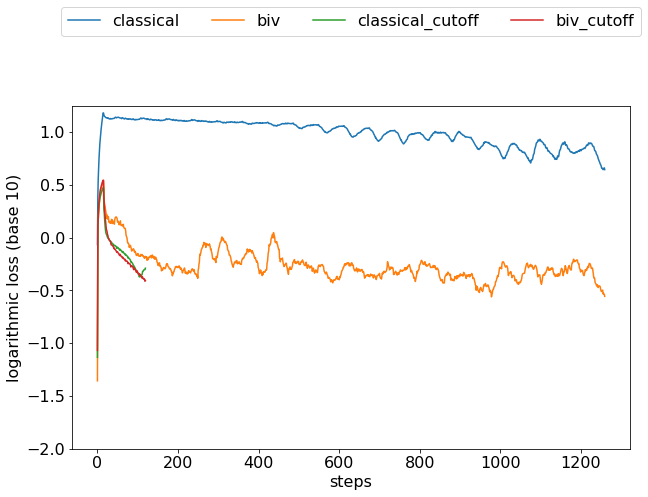

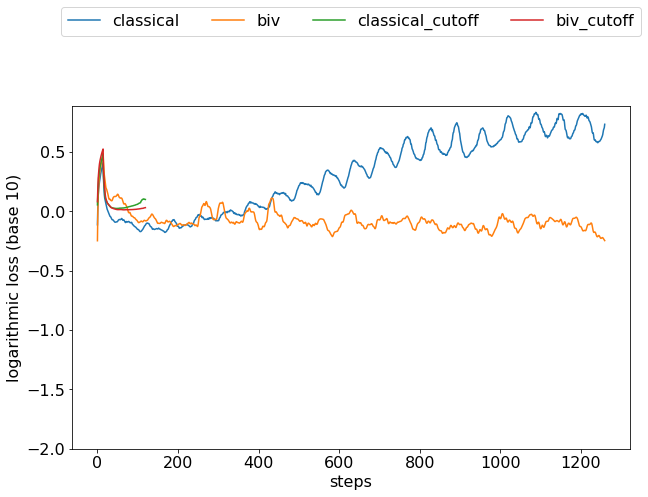

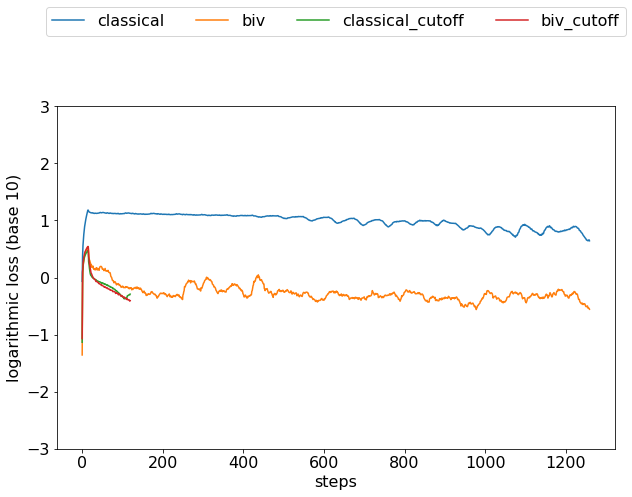

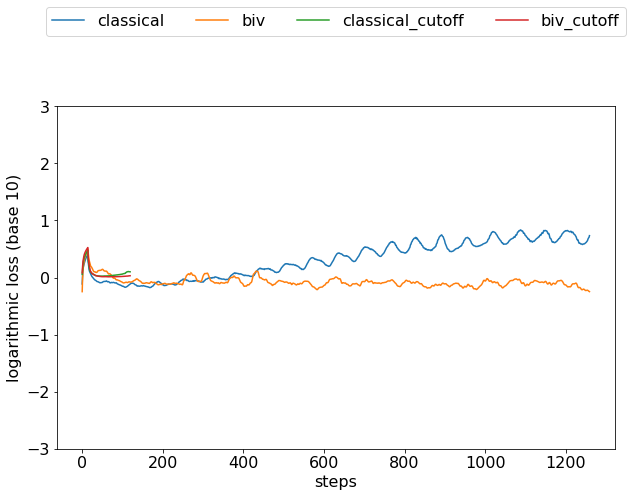

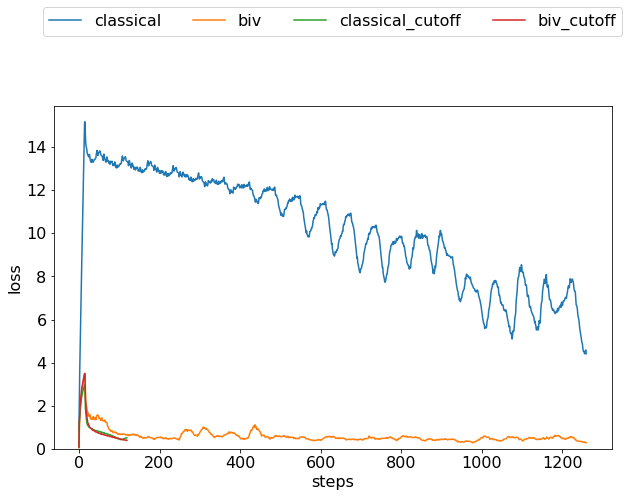

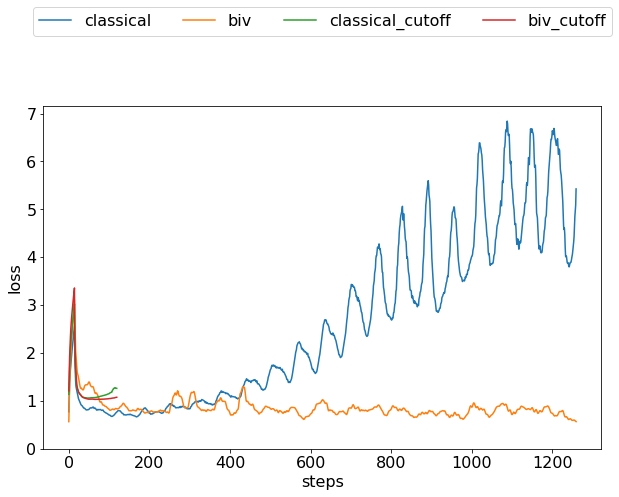

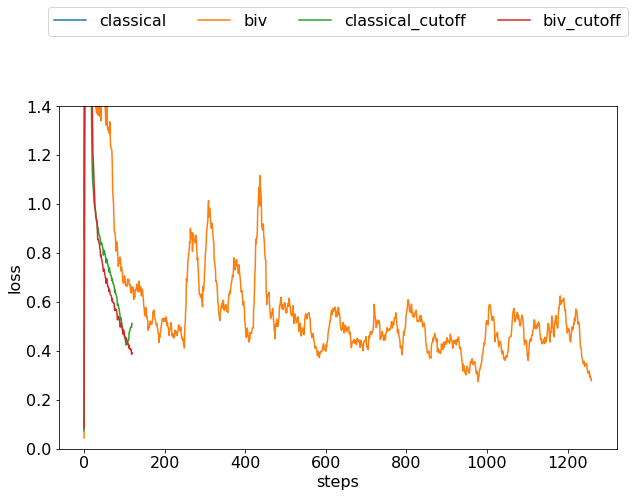

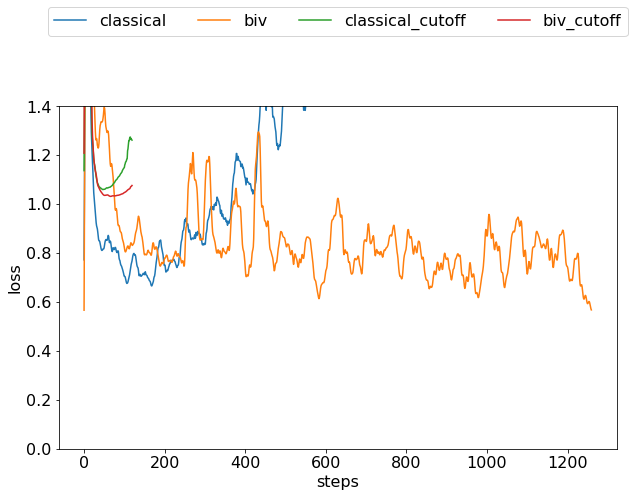

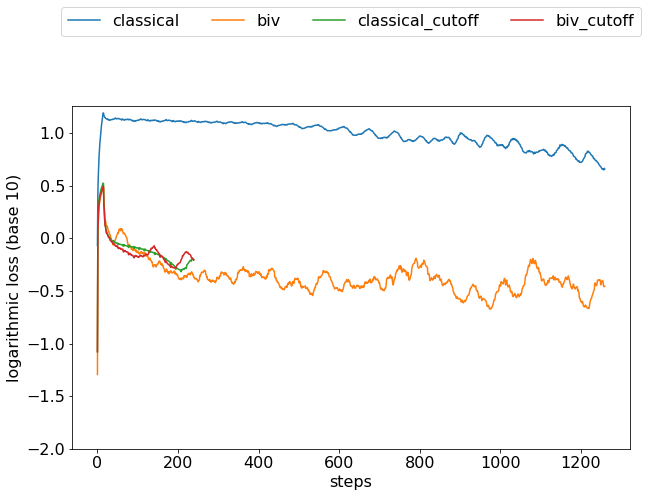

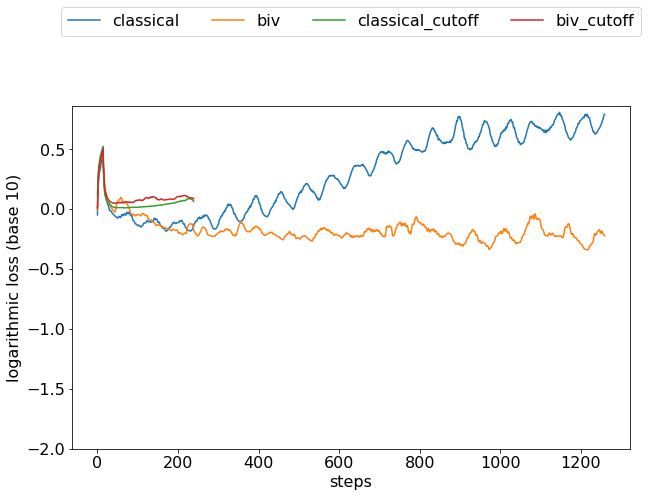

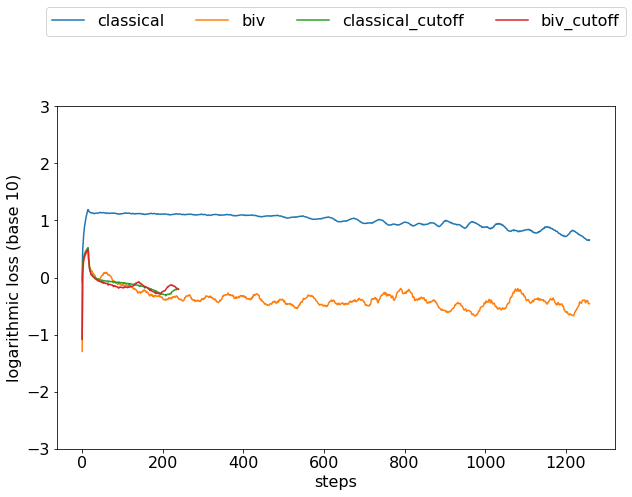

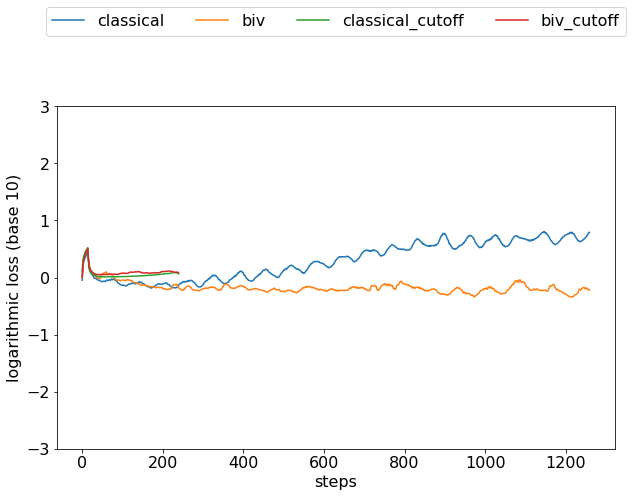

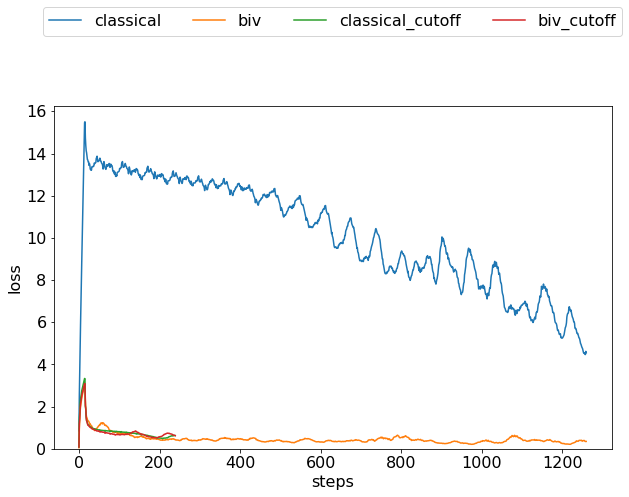

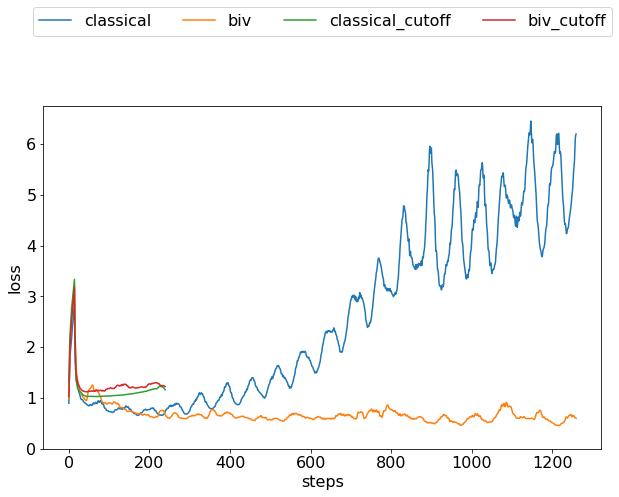

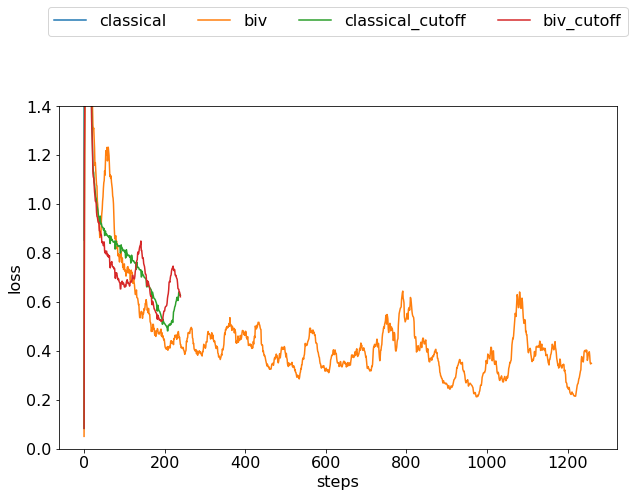

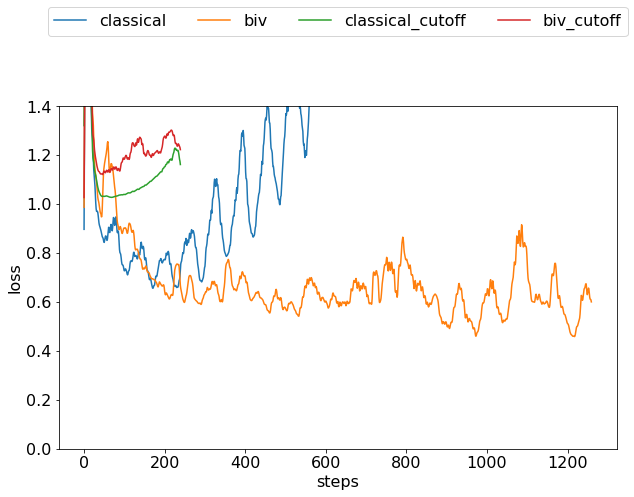

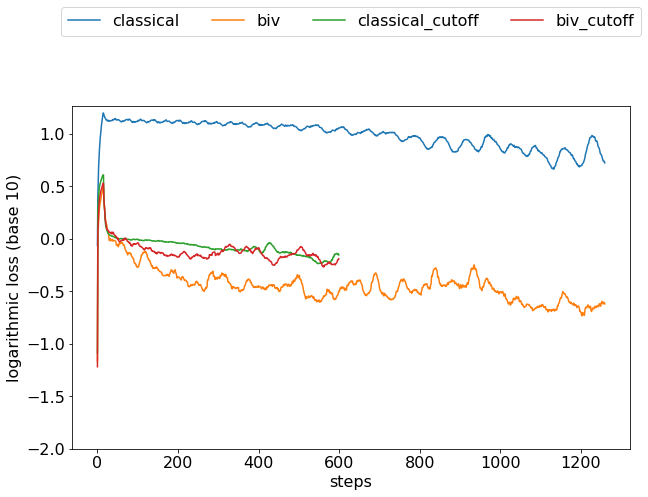

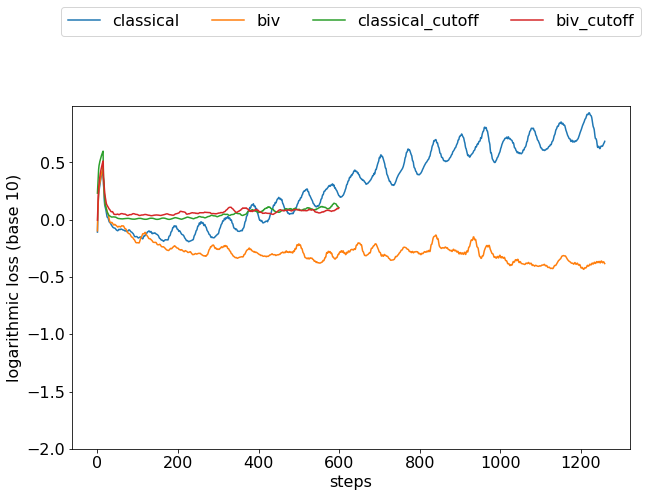

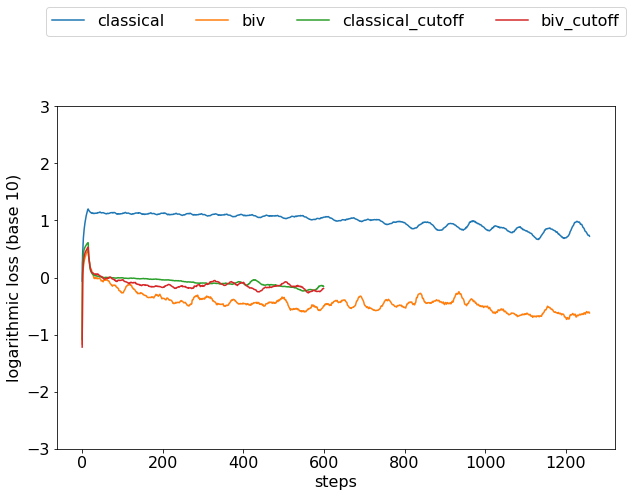

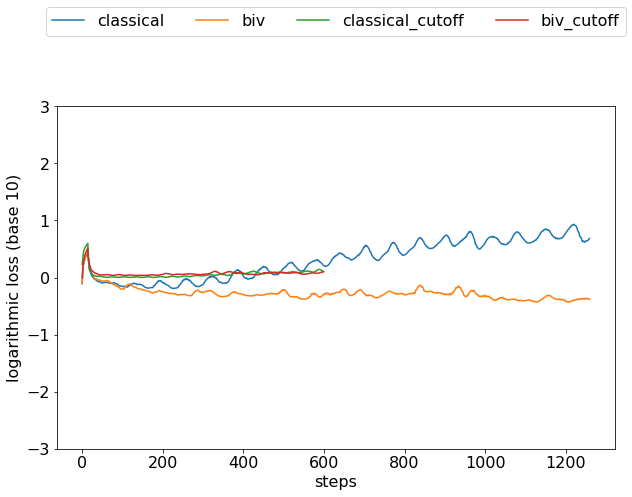

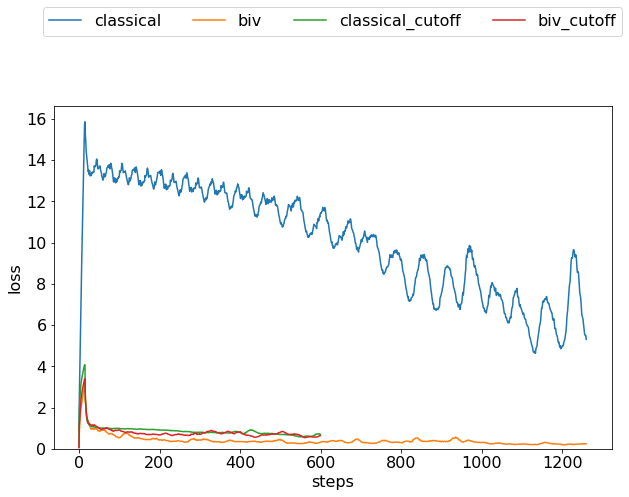

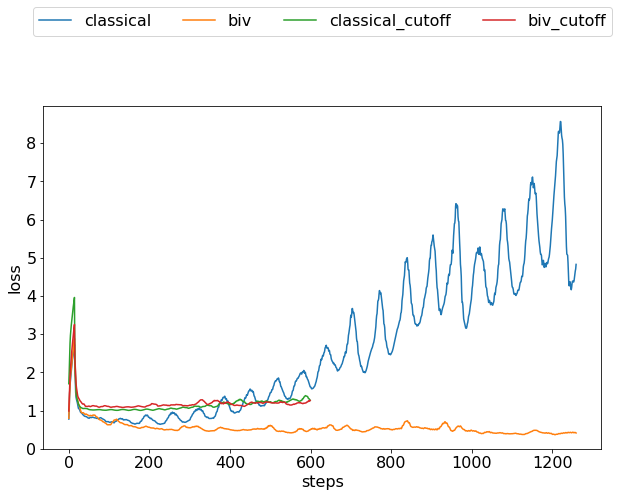

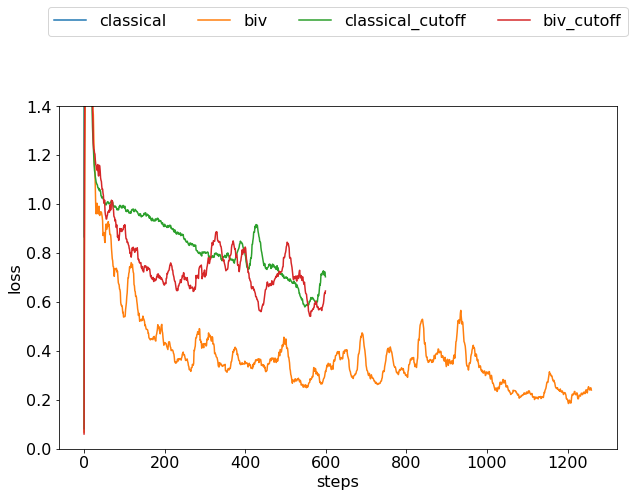

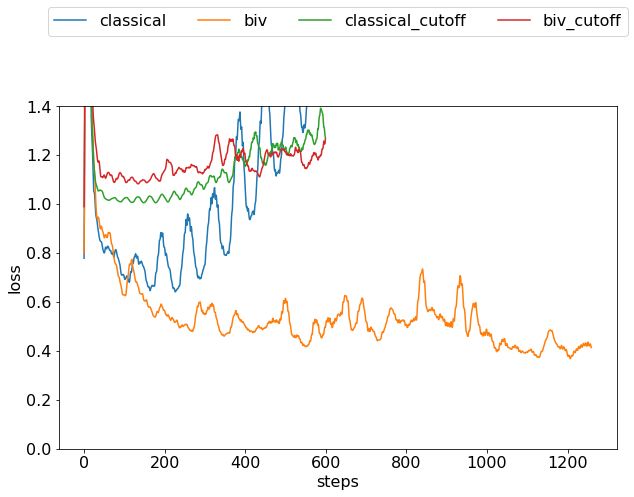

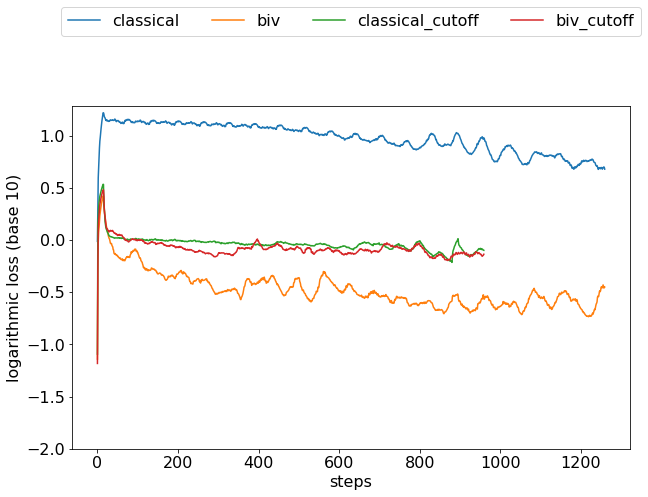

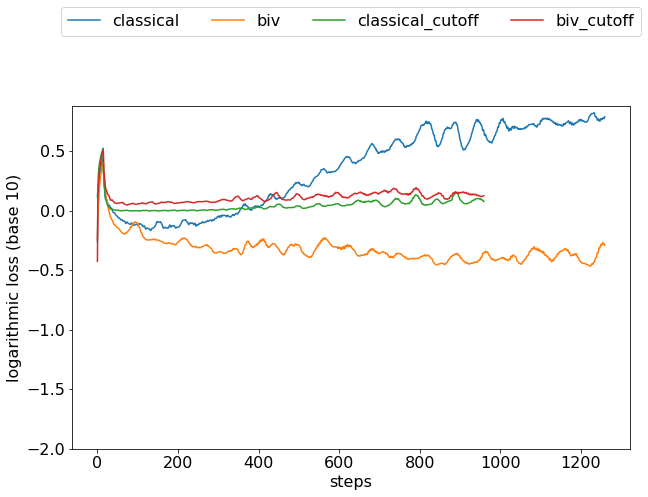

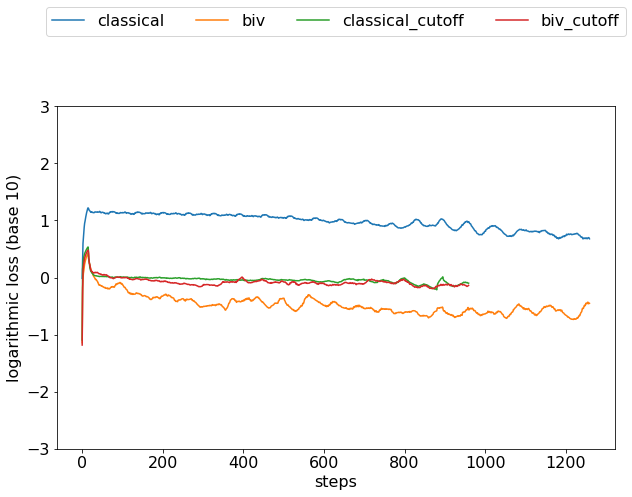

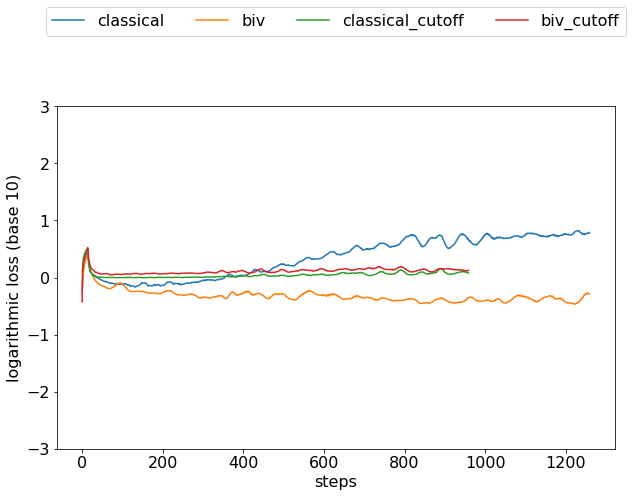

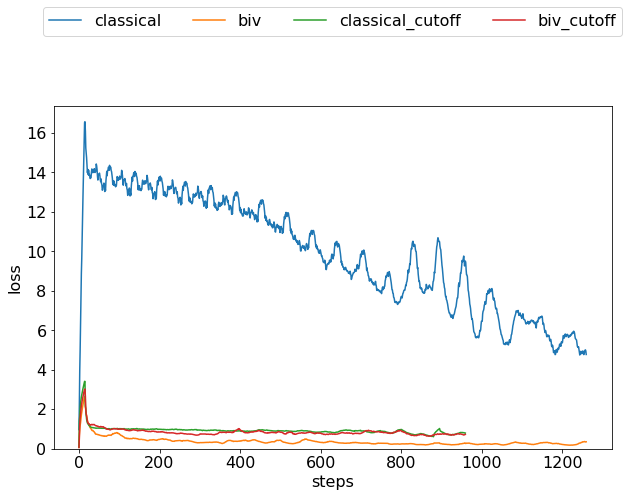

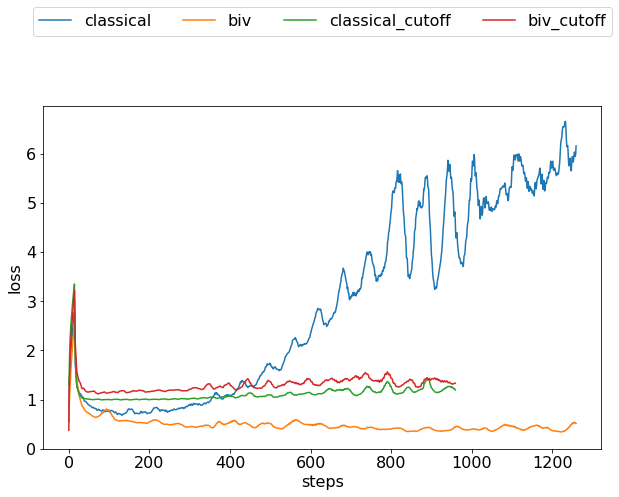

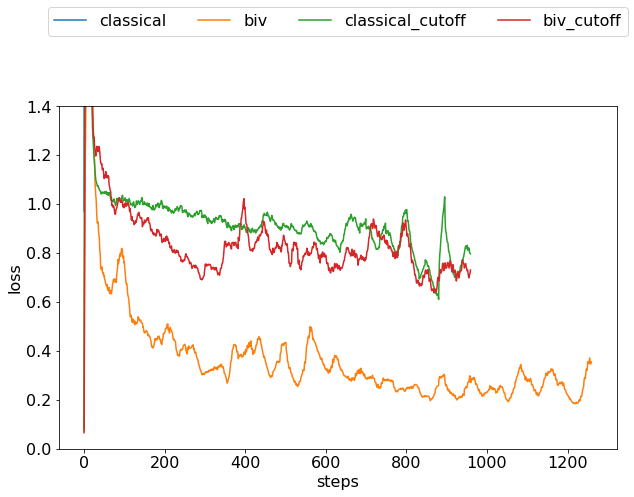

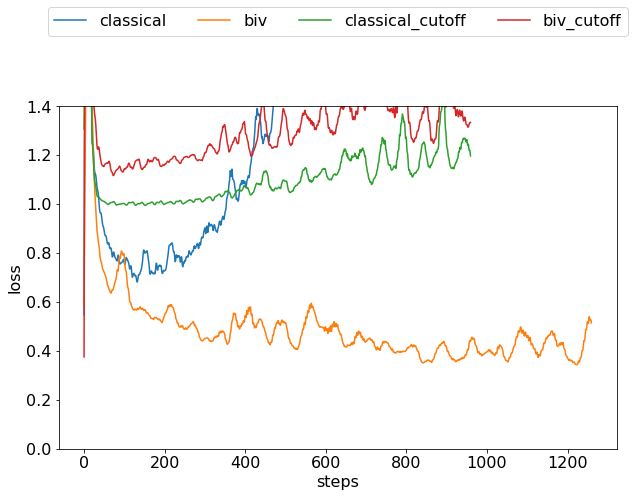

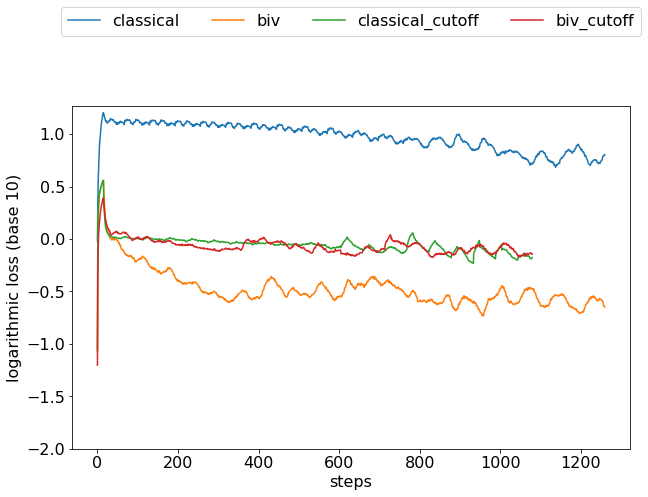

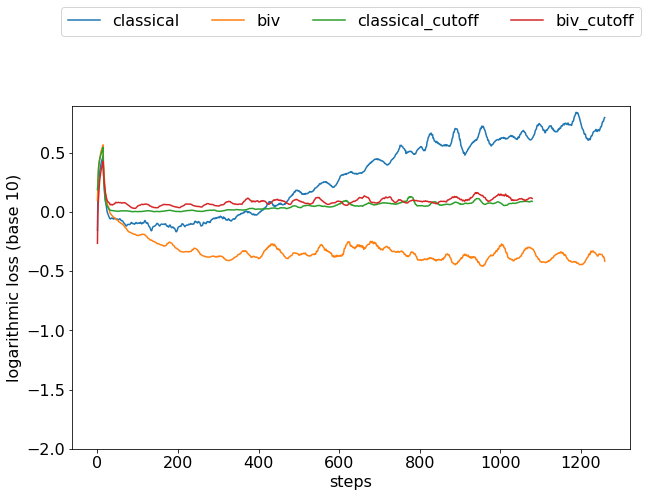

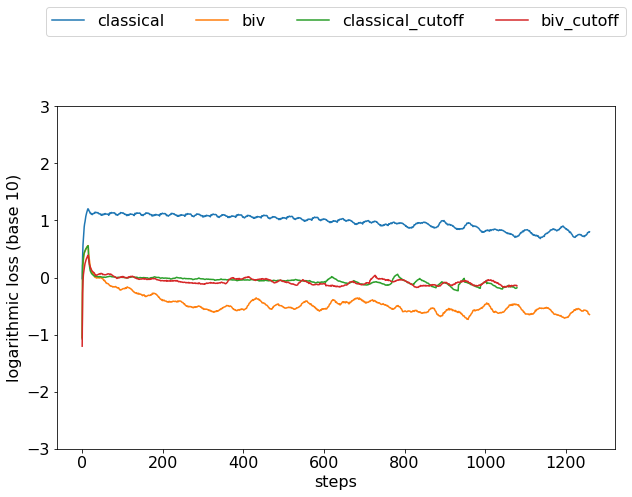

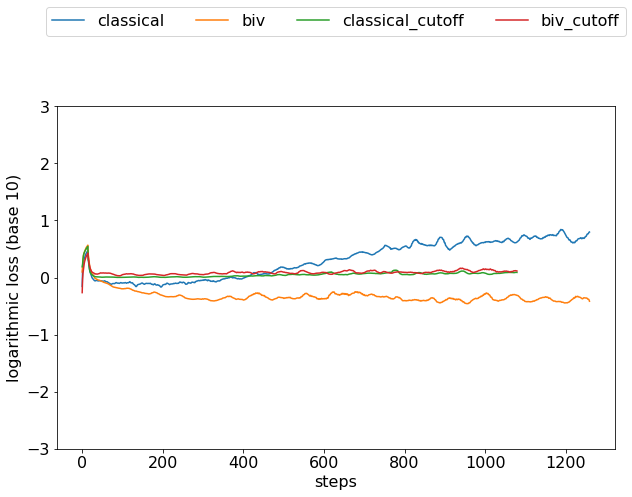

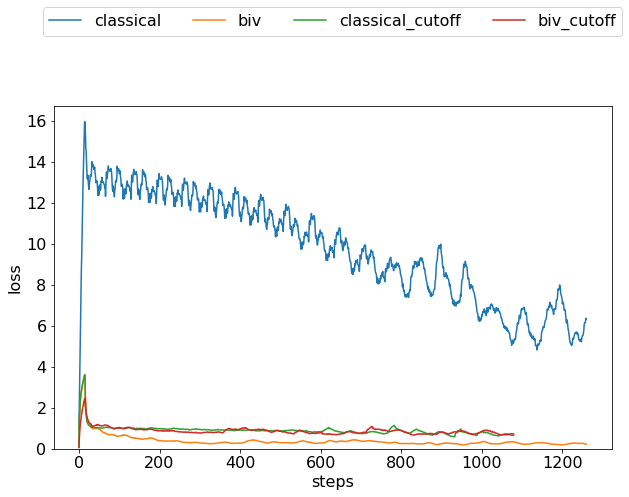

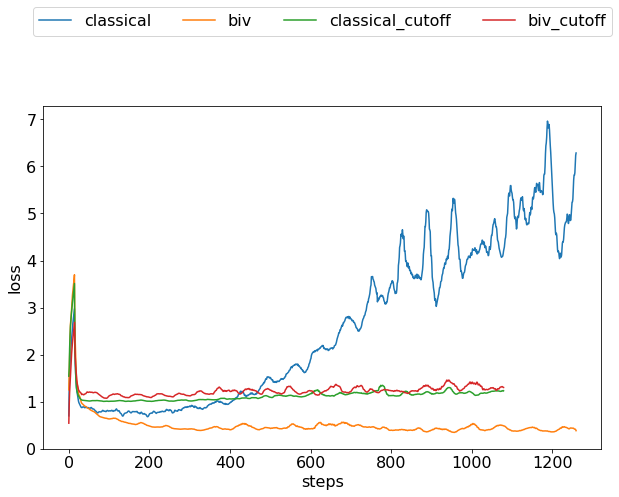

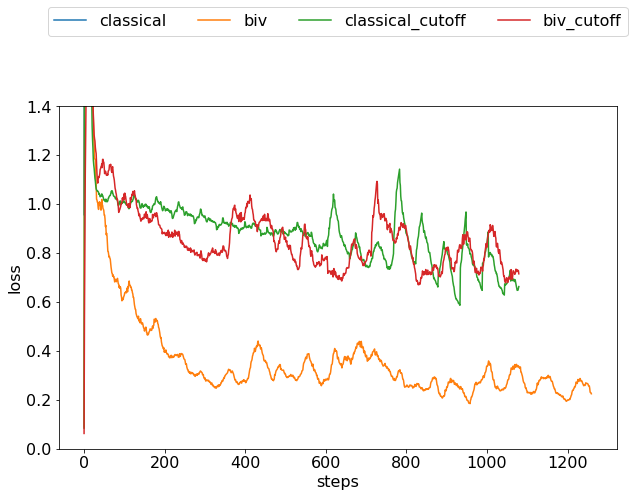

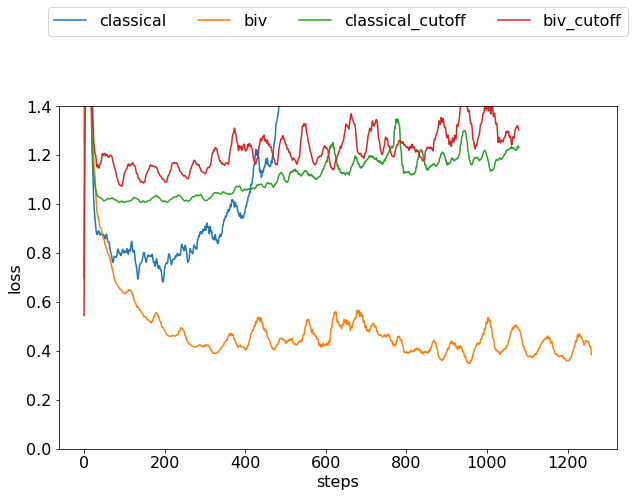

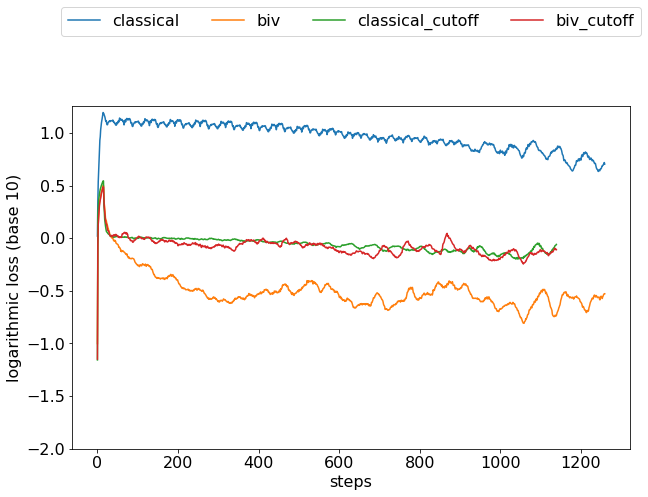

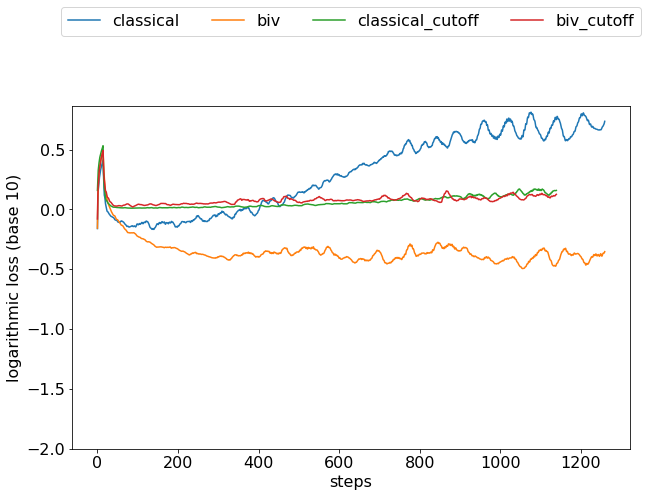

In [ ]:
path1="./classical/*"
path2="./biv/*"
path3="./classical_cutoff/*"
path4="./biv_cutoff/*"

data1 = results_avg(path1)
# data1 = data1[1:]
data2 = results_avg(path2)
# data2 = data2[1:]
data3 = results_avg(path3)
data4 = results_avg(path4)

def plugger(ddict):
    keys = ["0.0","0.05","0.1","0.2","0.5","0.8","0.9","0.95","1"]
 
    mdict=defaultdict(dict)
    for key in keys:
        for key2, data in ddict.items():
            if key =="0.0":
                pass
            else:
                mdict[key][key2]=(data[key])

    return mdict

all_data={"classical":data1,"biv":data2,"classical_cutoff":data3,"biv_cutoff":data4}

dataplug = plugger(all_data)

ide="all"
visualize2(ide, dataplug)

In [ ]:
path = "./classical/*"
data = results_avg(path)
ide = "classical/"
visualize(ide, data)

In [ ]:
path = "./biv/*"
data = results_avg(path)
ide = "biv/"
visualize(ide, data)

In [ ]:
path = "./classical_cutoff/*"
data = results_avg(path)
ide = "classical_cutoff/"
visualize(ide, data)

In [ ]:
path = "./biv_cutoff/*"
data = results_avg(path)
ide = "biv_cutoff/"
visualize(ide, data)

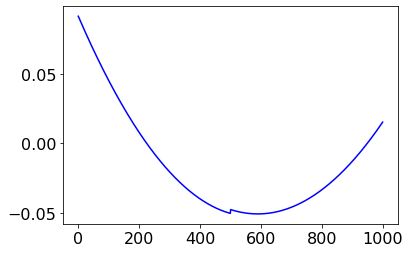

In [36]:
# y = np.random.randn(1000)
# #plt.plot(y)
# w = savgol_filter(y, 999, 2)
# plt.plot(w, 'b') 